In [2]:
# Import libraries
import pandas as pd # Data preprocessing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
import missingno as msno  # Missing data - Data visualization  # pip install missingno
from collections import Counter # Counting  #from collections import Counter

In [3]:
# load the dataset
df = pd.read_csv("Dune Sales Data.csv")


In [4]:
# Print the top rows  by default without specified the no it will give you top 5 rows. 
# you can always specified the no of rows you want like example 5 rows, 20 rows
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [5]:
# Print the bottom rows . By default it gives you the 5 bottom rows
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dimensionality of the data - This means the number of rows and columns
df.shape

(34867, 12)

In [7]:
# Examine the columns/features of the data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [8]:
# Investigate the dataset for annomalies and data types.
# Column as regarded as FEATURE for example features Enginnering
# Object rep a CATEGORICAL DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [9]:
# Numerical Startistical Analysis. it explore only the numerical column
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [10]:
# Categorical Statistical Analysis. it only explore only the categorical column
df.describe(include=["object", "bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


In [11]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

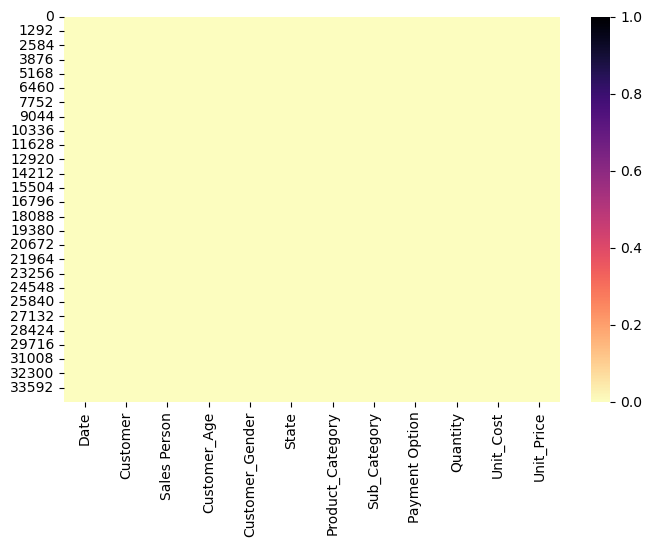

In [12]:
# Another method to investigate missing data is through visualization
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r");

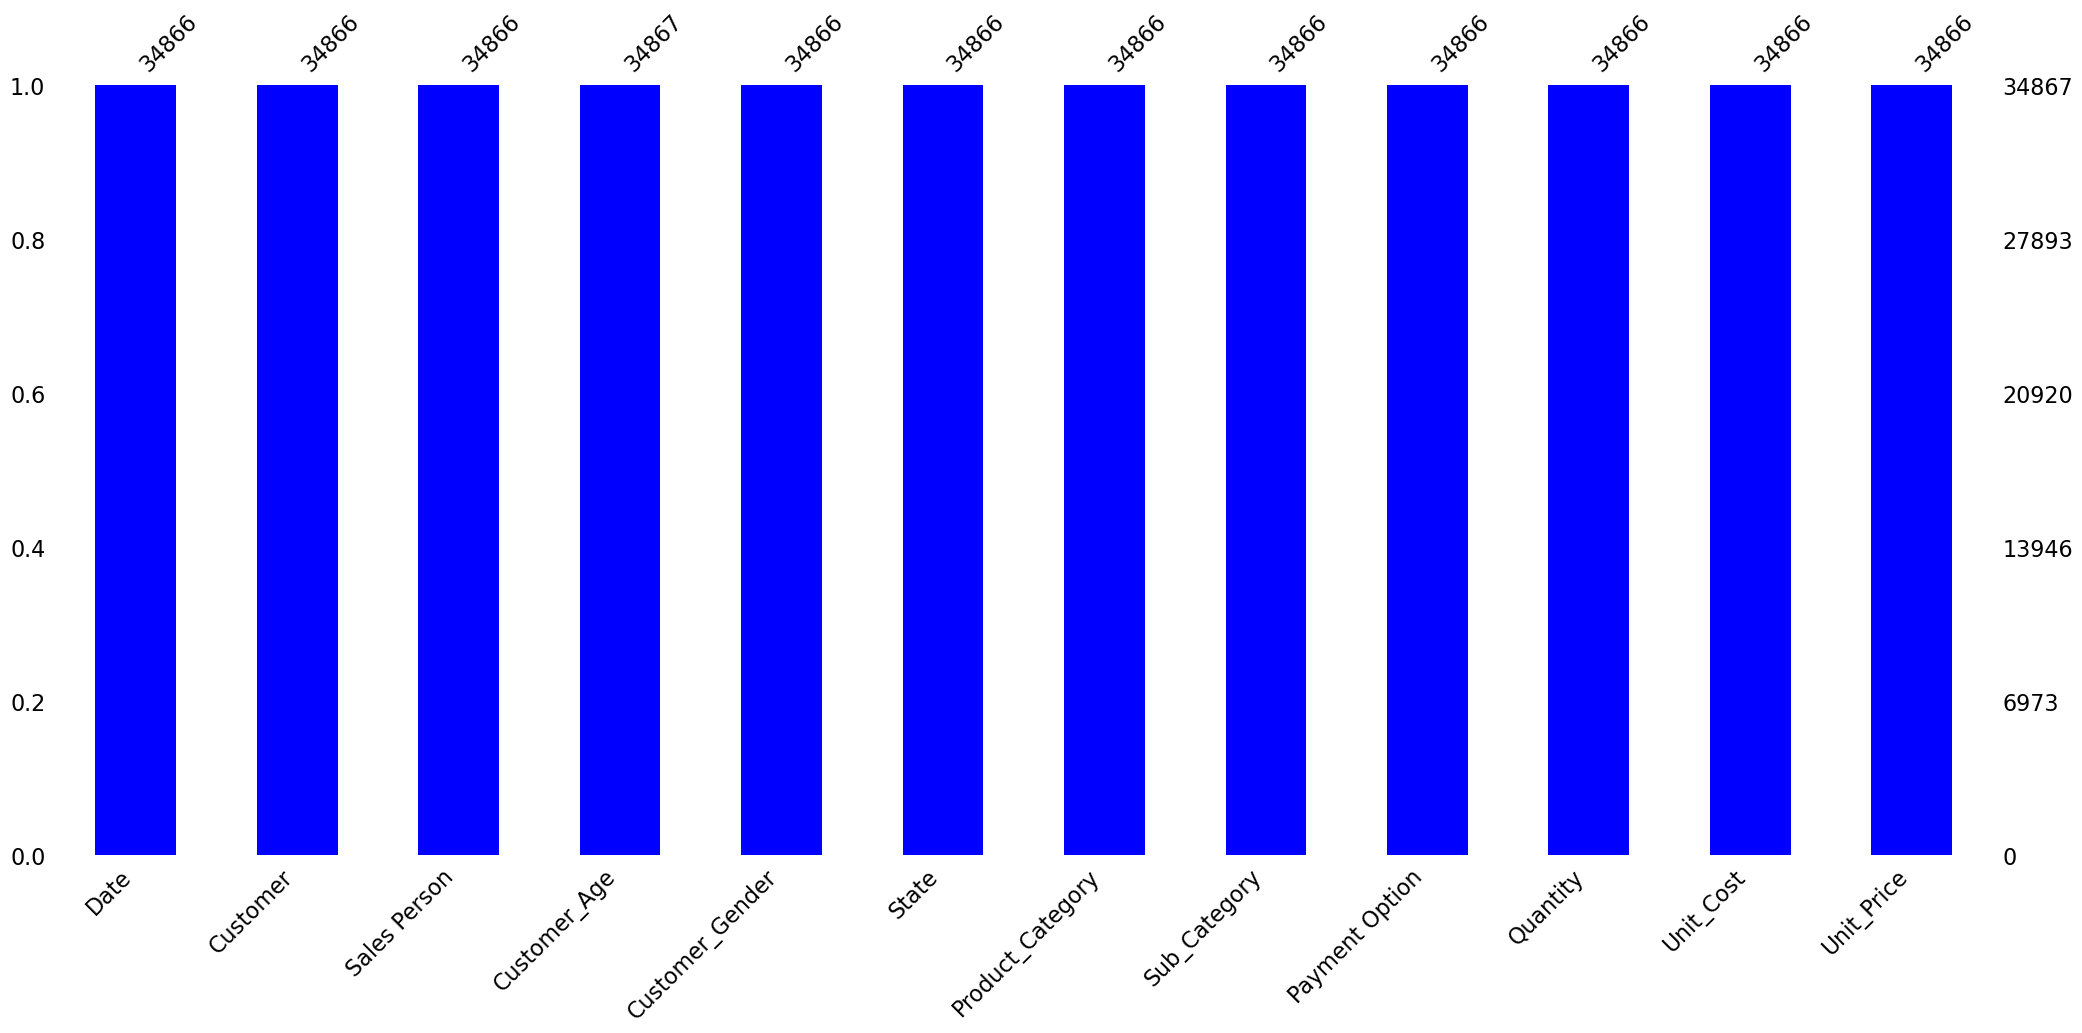

In [13]:
msno.bar(df, color="blue");

In [14]:
# Display where the missing data exist in the data
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Drop the missing data
df.dropna(inplace=True)

In [16]:
df.isnull().sum()  # its clear that we dont have missing value any longer

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [17]:
# Datatime Analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [18]:
# Convert the data column into a pandas datetime object 
# (Python see my date as object and it need to convert it to date)

df["Date"] = pd.to_datetime(df["Date"])
df["Date"]

# Extract the Year, Month, Quarter
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["month_name"] = df["Date"].dt.month_name()
df["quarter"] = df["Date"].dt.quarter

df.head(2)



/var/folders/8q/s72xlqjd6210hj4jy_8mjbyh0000gn/T/ipykernel_92917/796227901.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [19]:
# Group Customer age # x is customer_age and age_group is my function
def age_group(x):
    if x <= 25:
        return "<=25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elders"
    
# Apply function to the data
df["age_group"] = df["Customer_Age"].apply(age_group)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult


In [20]:
# Cost, Revenue and Profit calculations
df["cost"] = df["Quantity"]*df["Unit_Cost"]
df["revenue"] = df["Quantity"]*df["Unit_Price"]
df["profit"] = df["revenue"]- df["cost"]

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0


In [21]:
# Profit/loss grouping
def porl(x):
    if x>=0:
        return "Profit"
    else:
        return "Loss"
    
df["profit_label"] = df["profit"].apply(porl)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0,Profit


# Univariate Analysis

Univariate analysis involves analyzing the distribution and summary statistics of individual variables/Column/feature.

. Numerical Column/Feature = Numerical Visualization Techniques

. Categorical Column/Feature = Categorical Visualization Techniques. Example data type with OBJECT

### All THESE ARE CATEGORICAL DATA VISUALIZATION

In [ ]:
# How many customers belong to each customer spec
sns.countplot(x="Customer", data=df);

In [23]:
# We need to investigate column affected with Hign in the diagramm above
df[df["Customer"] == "Hign"].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,6.0,Profit


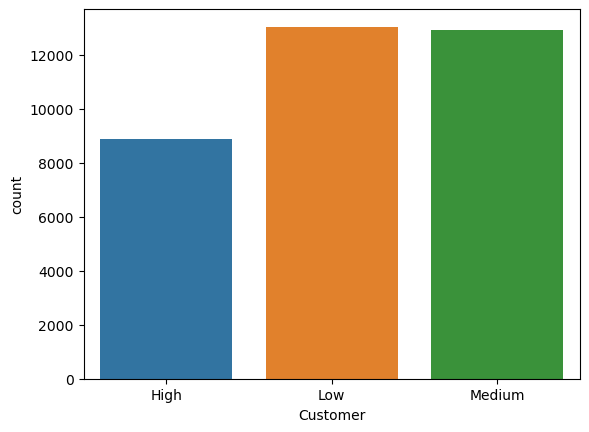

In [24]:
# Correct the spelling of Hign
df.loc[df["Customer"] == "Hign", "Customer"] = "High"

sns.countplot(x="Customer", data=df);


In [25]:
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

####### Narration 

* From the diagram, we can see Remota has the most transaction, same with Chinazam, Feyisola and Kenny has the least

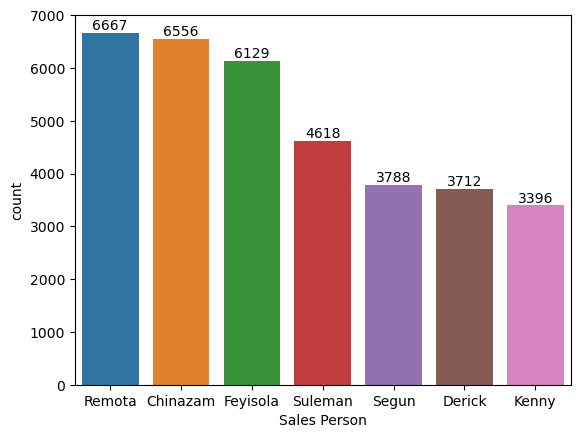

In [26]:
# Sales Person - How many tansaction by sales person  here is a column chart

ax=sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Narration

* The majority of the transaction are coming from 25-40 Adult

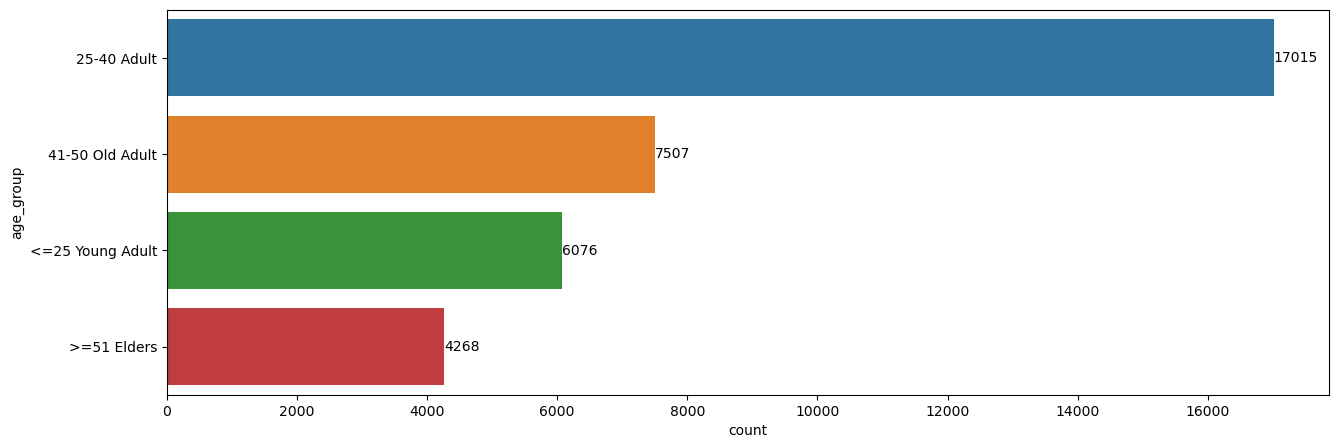

In [27]:
# Total transaction by Customer Age Group. here we want a bar chart, 
# then change the x to y on the code to get a bar chart.To ensure our labels are not out of the block use these code

plt.figure(figsize=(15,5))

ax=sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Narration

* The percentage number of the female customer is slightly greater that the percentage number of the male customer.

In [ ]:
df.columns

In [ ]:
# Total transaction by Customer Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transaction by Gender")
plt.show();

####### Narration 

* Among the top 10 states, Lagos has the highest transaction while Benue has the lowest transaction. 

In [ ]:
# Top 10 transaction by state
plt.figure(figsize=(20,5))

topten = df["State"].value_counts().head(10)

sns.countplot(x="State", data=df, order=topten.index);
print(topten)

In [ ]:
#- Product Category
#- Sub Category
#- Payment option
#- Month Name

####### Narration 

* we make more profit compare to loss.

In [ ]:
# Total transaction by Profit or Loss

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["profit_label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transaction by Profit or Loss")
plt.show();

## NUMERICAL DATA VISUALIZATION

In [ ]:
# Quantity, Cost, Revenue and Profit - using Subplot
# Take note : Boxplot, Scatteredplot, histogram are all used for numerical data

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on cost")

sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Quantity sold")

sns.histplot(x="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Histogram on profit");


## BIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS
 Bivariate analysis involves analyzing the relationship between two variables
   
   . focus on profit

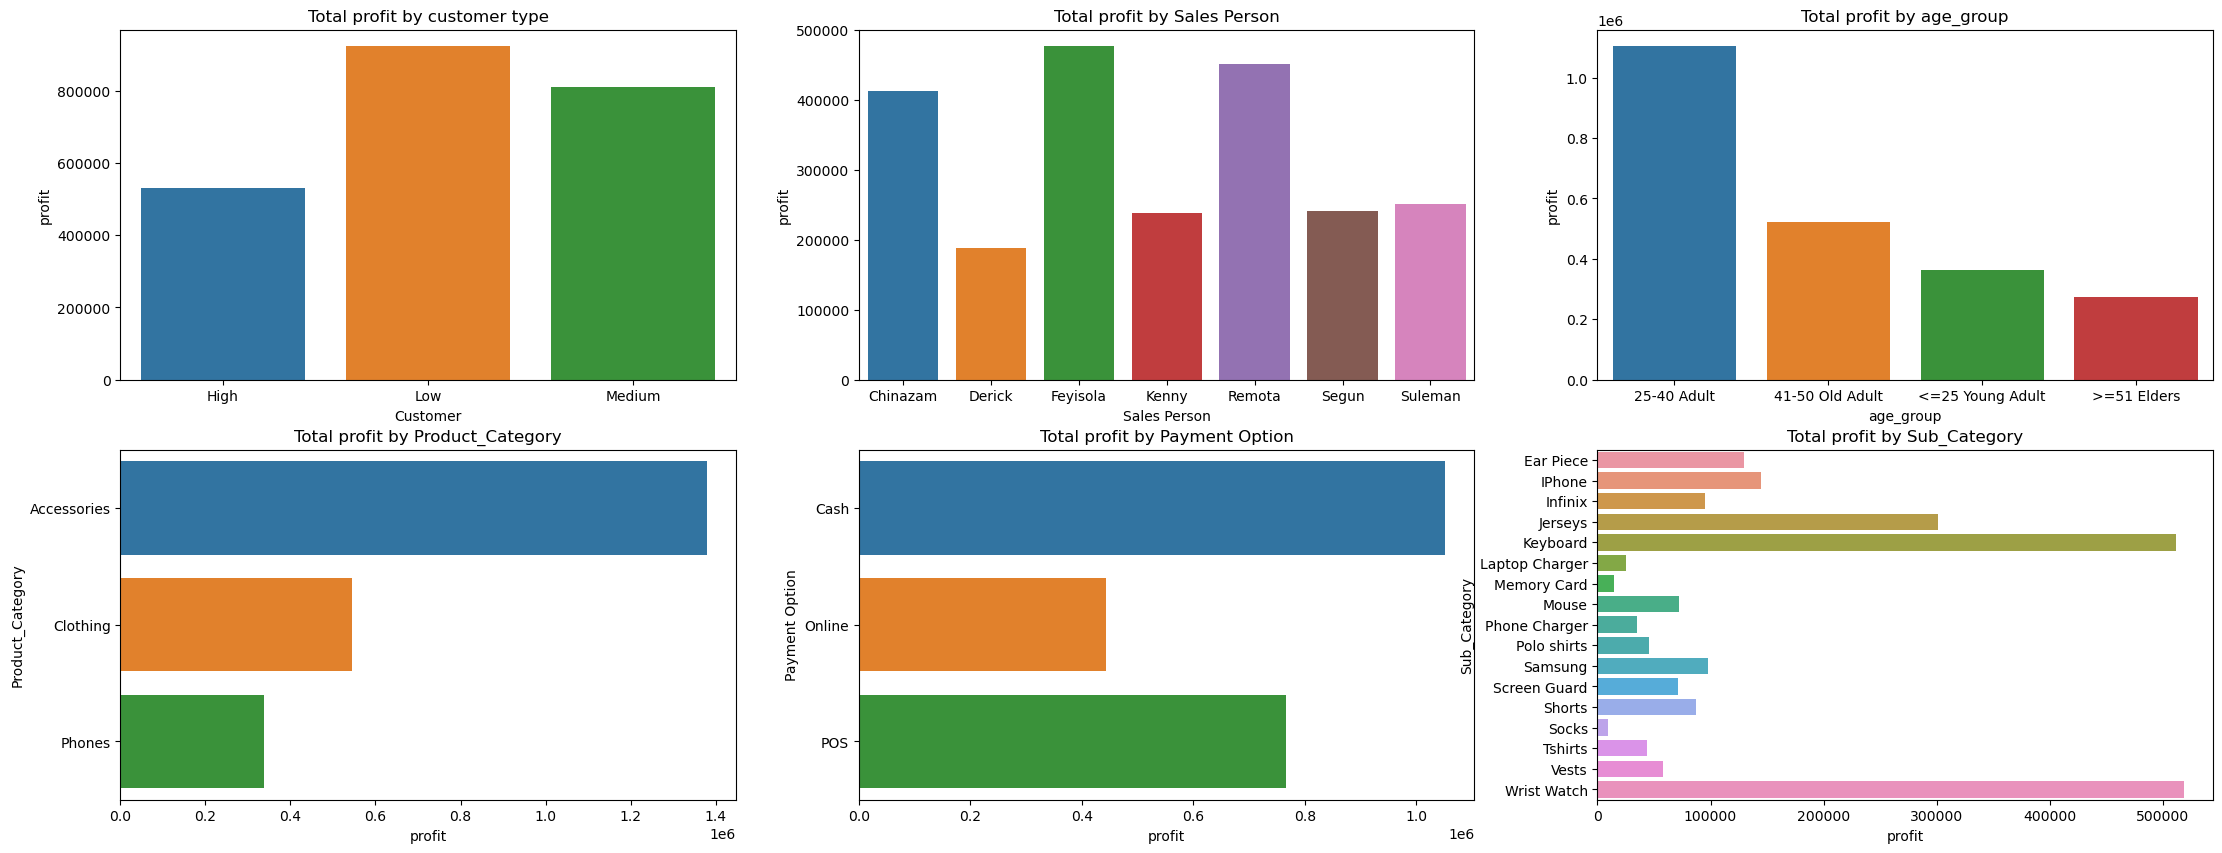

In [29]:
# We want to check the relationshoip between profit and customer, etc
# "Groupby" look at the customer column and sum all the profit

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

cust_prof = df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x="Customer", data=cust_prof, y="profit", ax=axs[0,0])
axs[0,0].set_title("Total profit by customer type");

sp_prof = df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x="Sales Person", data=sp_prof, y="profit", ax=axs[0,1])
axs[0,1].set_title("Total profit by Sales Person");

ag_prof = df.groupby("age_group")["profit"].sum().reset_index()
sns.barplot(x="age_group", data=ag_prof, y="profit", ax=axs[0,2])
axs[0,2].set_title("Total profit by age_group");

pc_prof = df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(y="Product_Category", data=pc_prof, x="profit", ax=axs[1,0])
axs[1,0].set_title("Total profit by Product_Category");

po_prof = df.groupby("Payment Option")["profit"].sum().reset_index()
sns.barplot(y="Payment Option", data=po_prof, x="profit", ax=axs[1,1])
axs[1,1].set_title("Total profit by Payment Option");

sc_prof = df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(y="Sub_Category", data=sc_prof, x="profit", ax=axs[1,2])
axs[1,2].set_title("Total profit by Sub_Category");


## BIVARIATE ANALYSIS FOR NUMERICAL COLUMNS

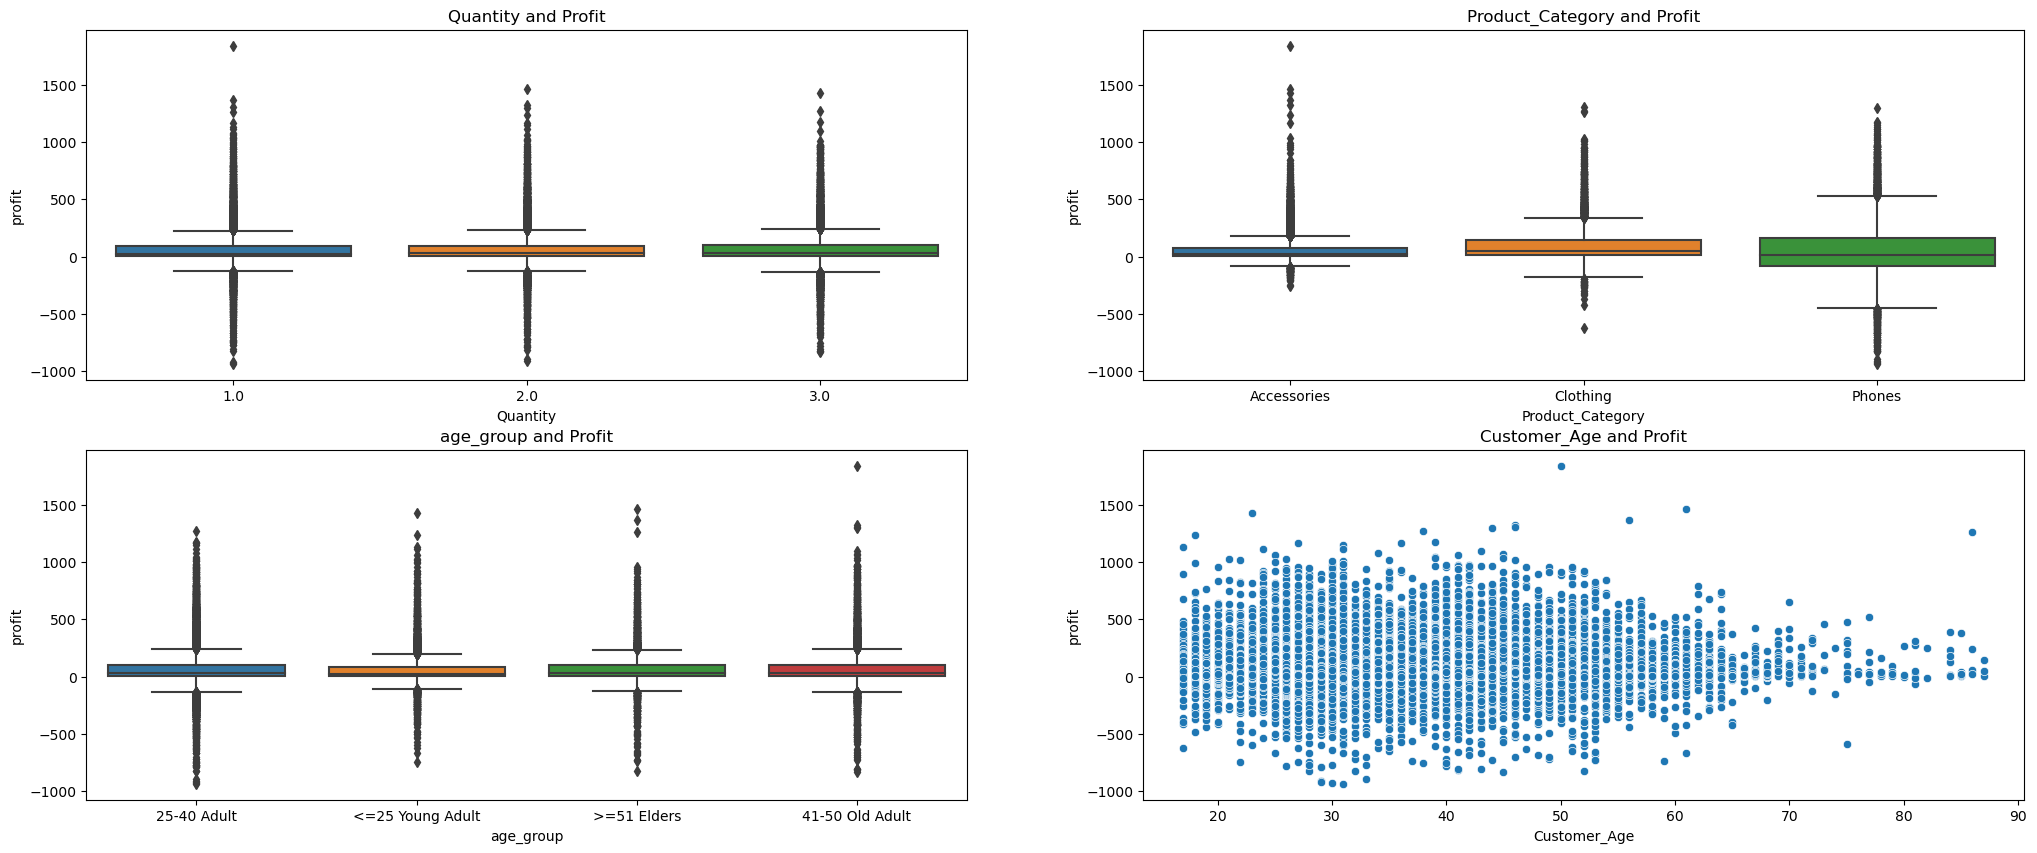

In [30]:
#Relationship between Quantity and Profit.
# Scatterplot looks at two numerical data against one another

# Numerical Columns

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x="Quantity", y= "profit", data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit")

sns.boxplot(x="Product_Category", y= "profit", data=df, ax=axs[0,1])
axs[0,1].set_title("Product_Category and Profit")

sns.boxplot(x="age_group", y= "profit", data=df, ax=axs[1,0])
axs[1,0].set_title("age_group and Profit")

sns.scatterplot(x="Customer_Age", y= "profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Customer_Age and Profit");


### MULTIVARIATE ANALYSIS
. Multivariate analysis involves analyzing the relationship between three or more variables

In [31]:
# comparing product category against cost, revenue and profit
# creating a variable call procat which means product category
# pd.melt is used to transpose the data

procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat

,Product_Category,cost,revenue,profit
0,Accessories,6041896.06,7420663.12,1378767.06
1,Clothing,2892324.94,3437556.95,545232.01
2,Phones,11148745.02,11486354.63,337609.61


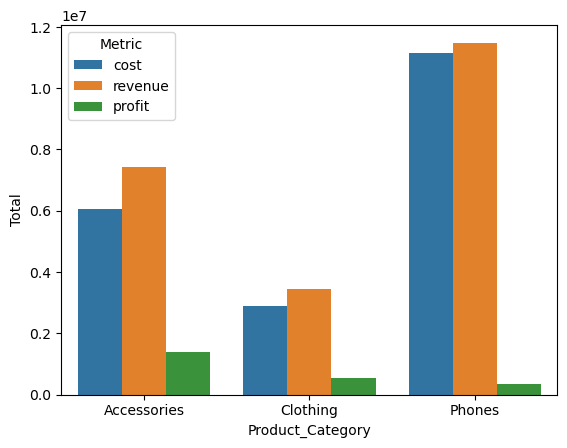

In [32]:
procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat1 = pd.melt(procat, id_vars="Product_Category", var_name="Metric", value_name="Total")
sns.barplot(data=procat1, x="Product_Category", y="Total", hue="Metric");

<Axes: xlabel='month', ylabel='profit'>

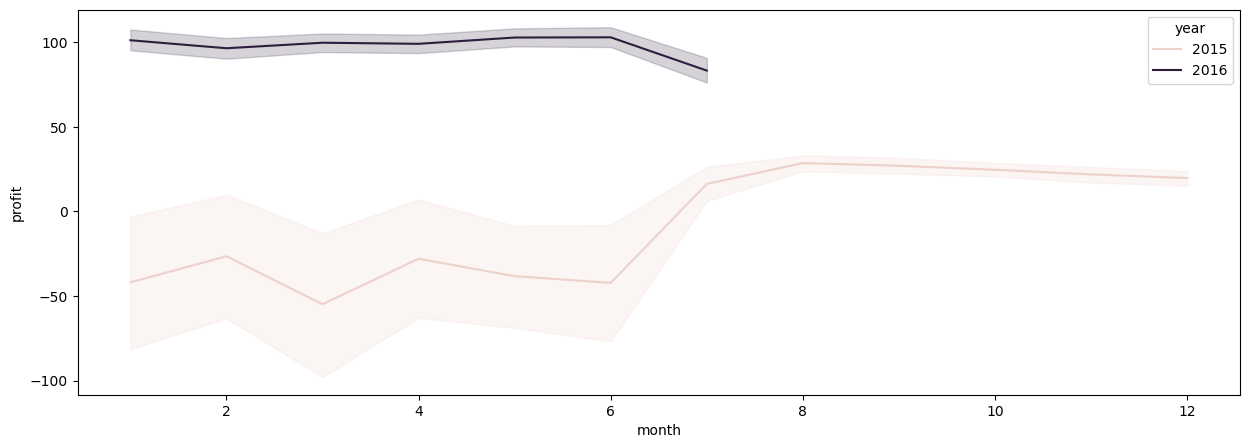

In [33]:
#comparing Month against Profit

plt.figure(figsize=(15,5))
sns.lineplot(x="month", y="profit", data=df, hue="year")

In [34]:
# USING PIVOT TABLE
df.pivot_table(values="profit", index="year", columns="month", aggfunc="sum")

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


In [35]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

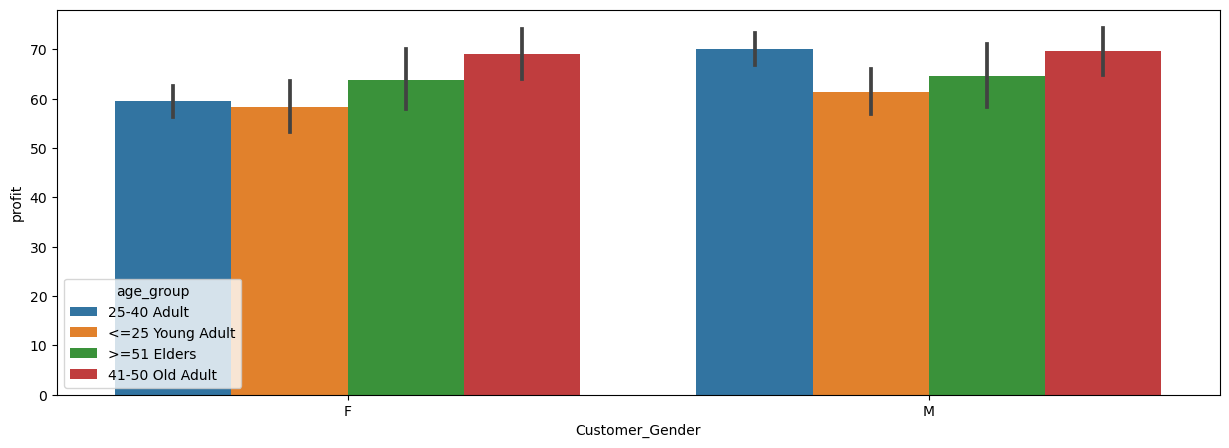

In [36]:
# comparing customer gender, age group and profit

plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y="profit", data=df, hue="age_group");


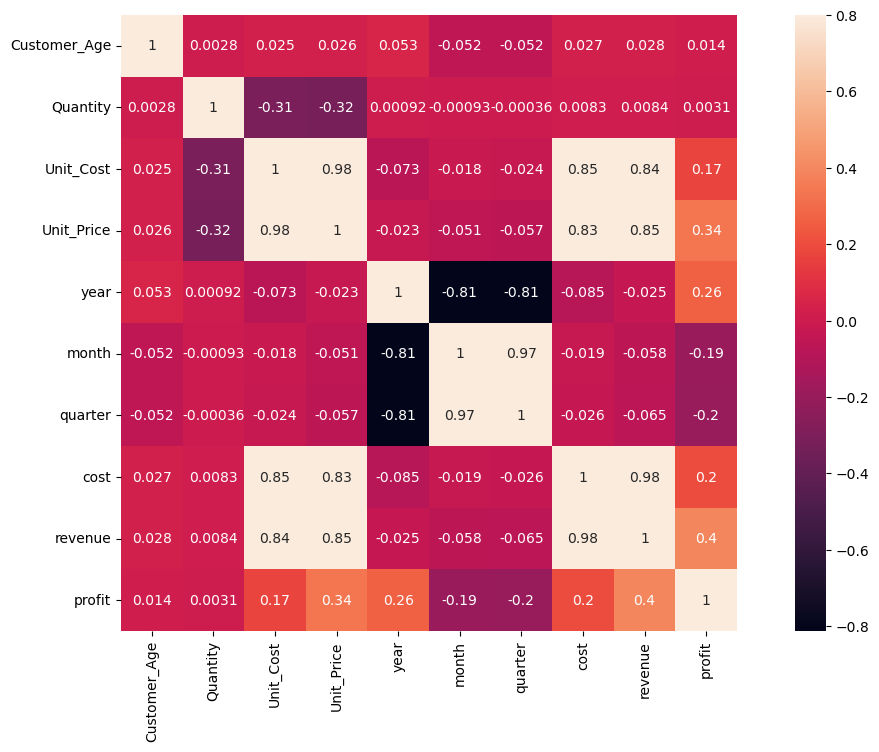

In [37]:
# CORRELATION falls under MULTIVARIATE ANALYSIS
# i couldnt display my correlation cos i have a non numeric values in my data . 
# i have to convert from non numeric values to numeric values.
numeric_data = df.select_dtypes(include="number")
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix, vmax=.8, square=True, annot=True);

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


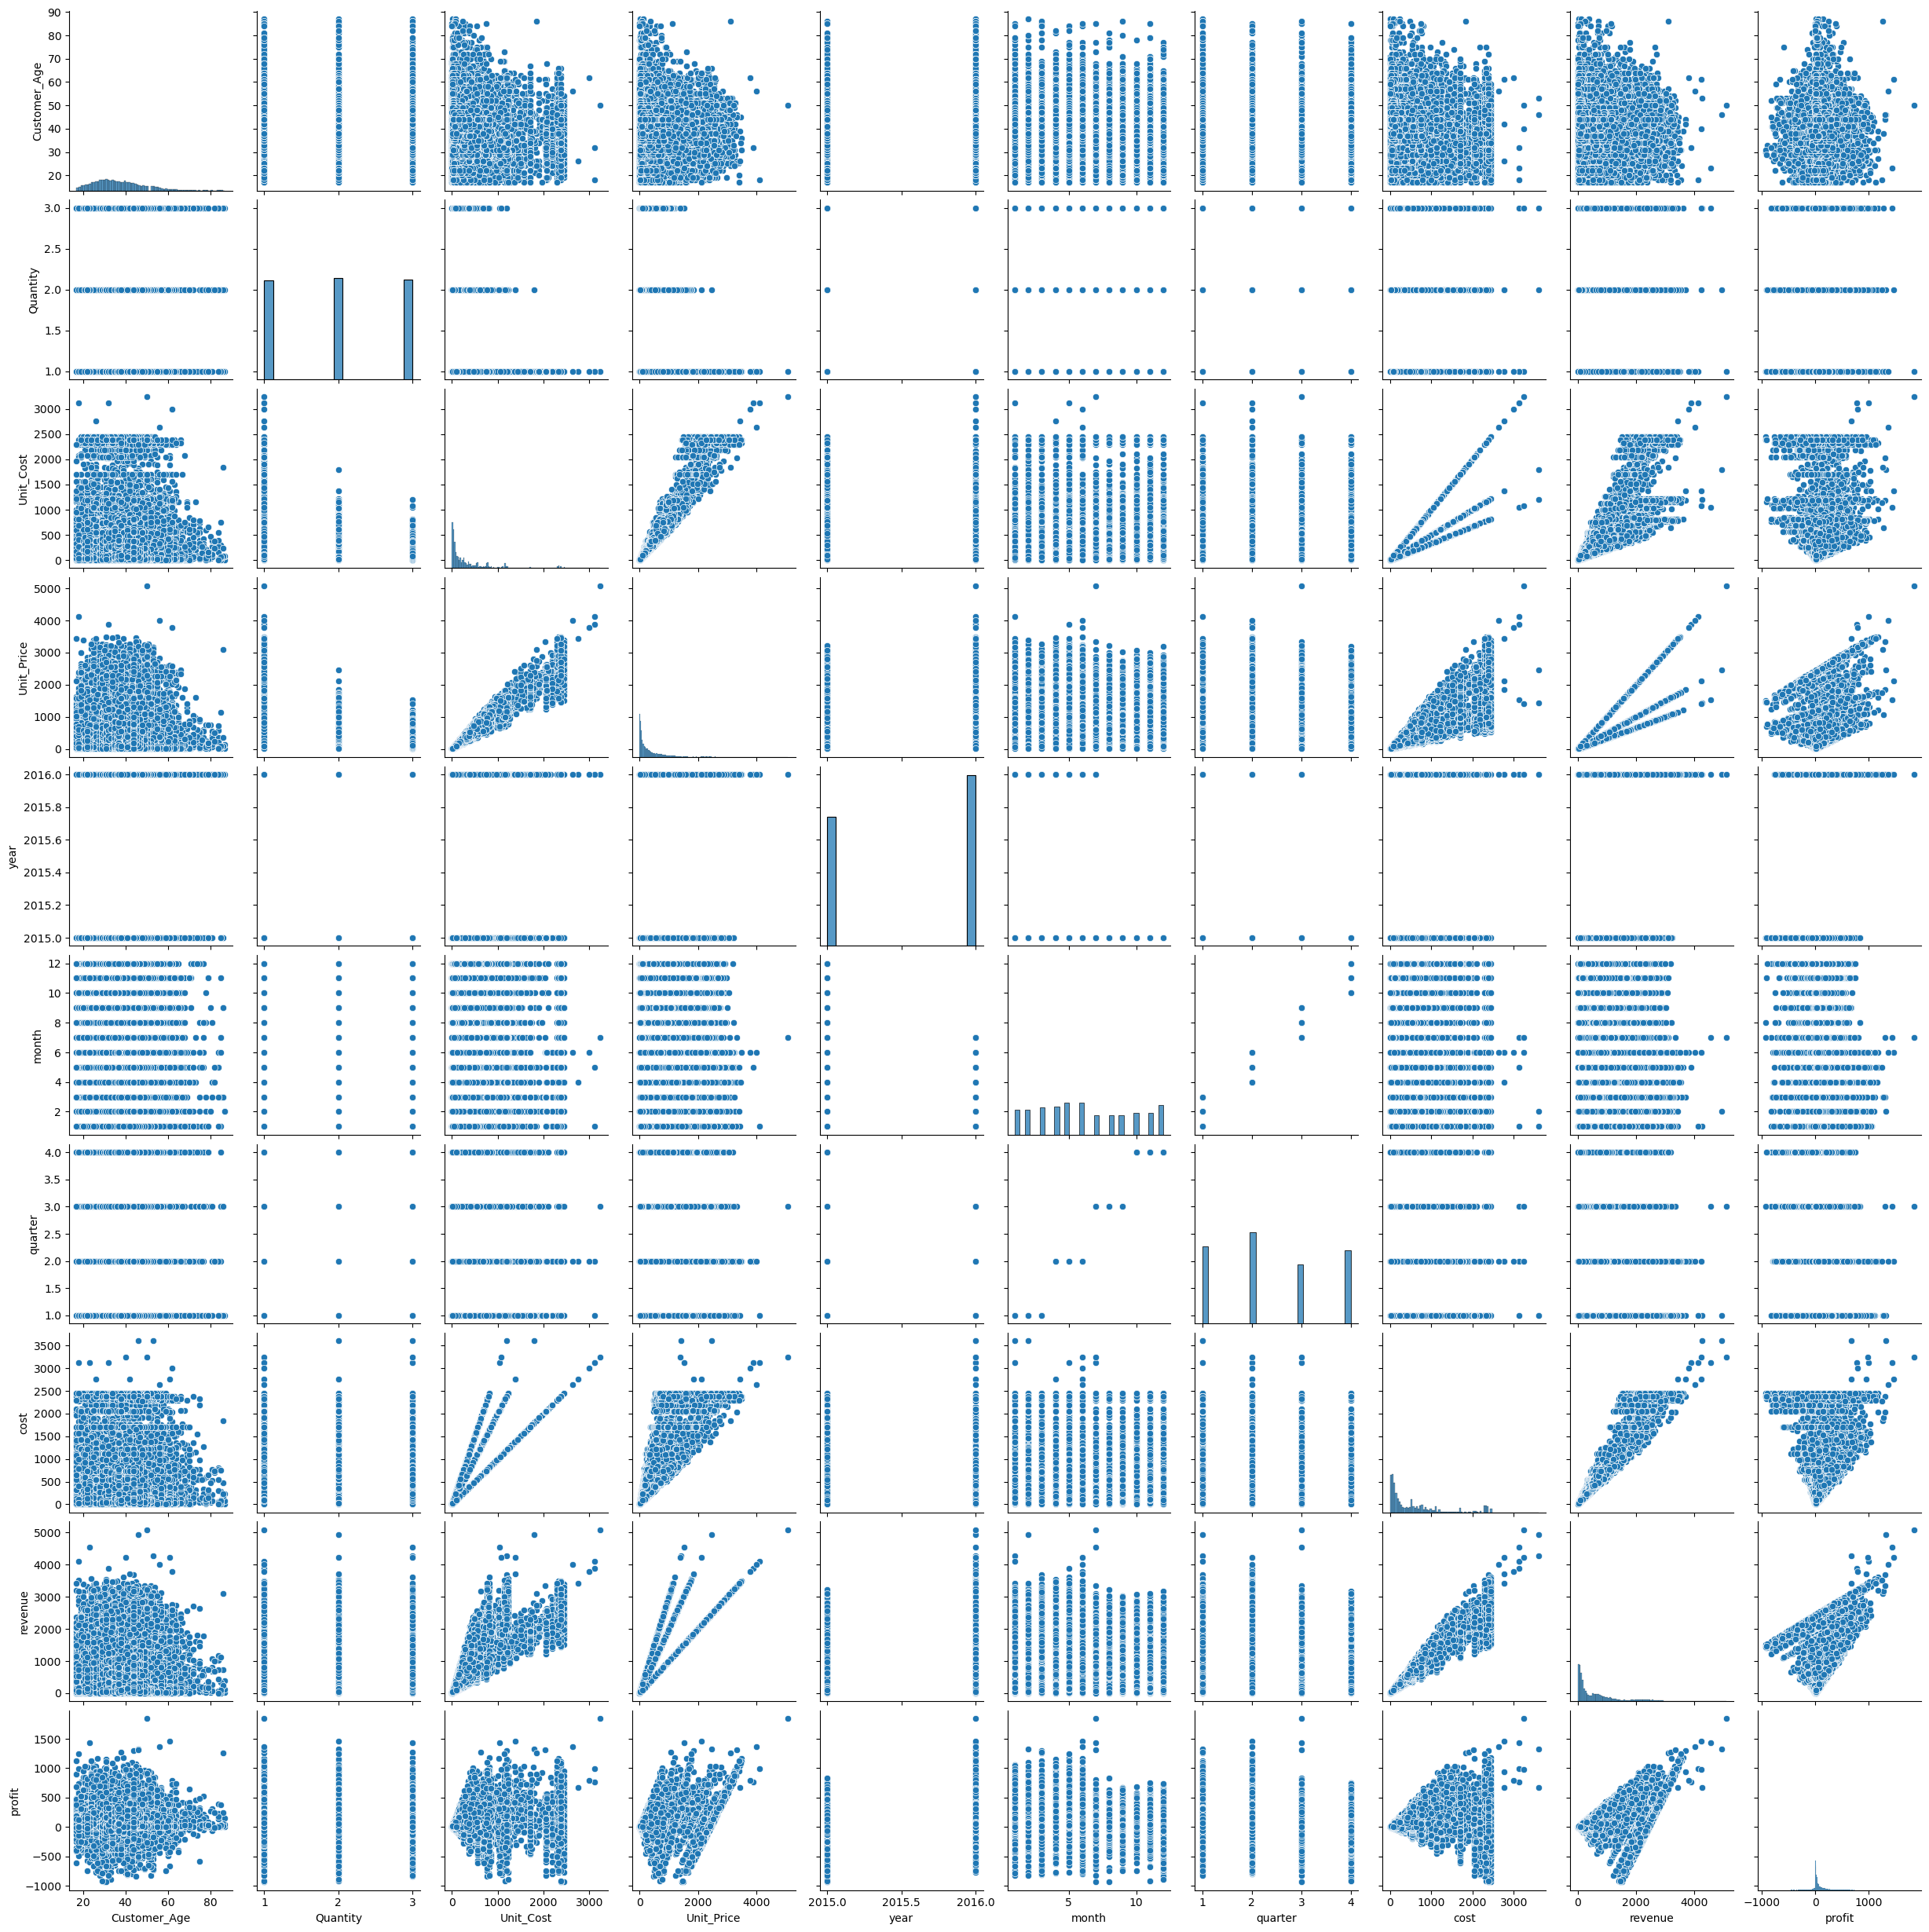

In [38]:
### PAIRPLOT makes life easier and it looks into Numerical column
## import warnings  ( if you dont want to see the warning signs display)
## warnings.filterwarnings("ignore")
sns.pairplot(df, size=2.5);